<a href="https://colab.research.google.com/github/EdwSanA/DPro_Tareas/blob/main/Problema_Manju_Casta%C3%B1o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**El problema del bollo de castañas**

Hay un famoso episodio sobre 2 a la enésima potencia [1] en el que aparece una herramienta llamada “Byvine” en Manga Doraemon.

[1] Fujiko F. Fujio (1979) “Doraemon (17)” Shogakukan.

"Byevine" es una medicina, y si se espolvorea sobre ella, el objeto se duplica cada 5 minutos. Aumenté la cantidad de bollos de castañas en el proceso, pero como no podía comerlo, usé un cohete y lo lancé al espacio.

Un tema de discusión frecuente aquí es cómo aumentan de volumen los bollos de castañas en el espacio. Existe mucho debate al respecto, pero calculemos simplemente cómo aumenta el volumen de un bollo de castañas.

**[Problema] El día en que los bollos de castañas cubran el sistema solar**

Si rocías un panecillo de castañas con vid, ¿cuánto tardará en cubrir el sistema solar con panecillos de castañas? Crea un programa para calcularlo.

Haz suposiciones sobre el volumen de los panecillos de castañas y el sistema solar basándote en tu investigación y cálculos. Puedes simplificar el problema ignorando la diferencia entre los panecillos de castañas y la gravedad.

Cree un programa genérico que pueda aplicarse a otras situaciones, como el tiempo que tarda el Tokyo Dome en llenarse al rociar una bola con Byvine. Además, cree un cuaderno fácil de entender, por ejemplo, que muestre una gráfica.

Sistema Solar: duplicaciones = 144, tiempo ≈ 720 min (~12.00 h)


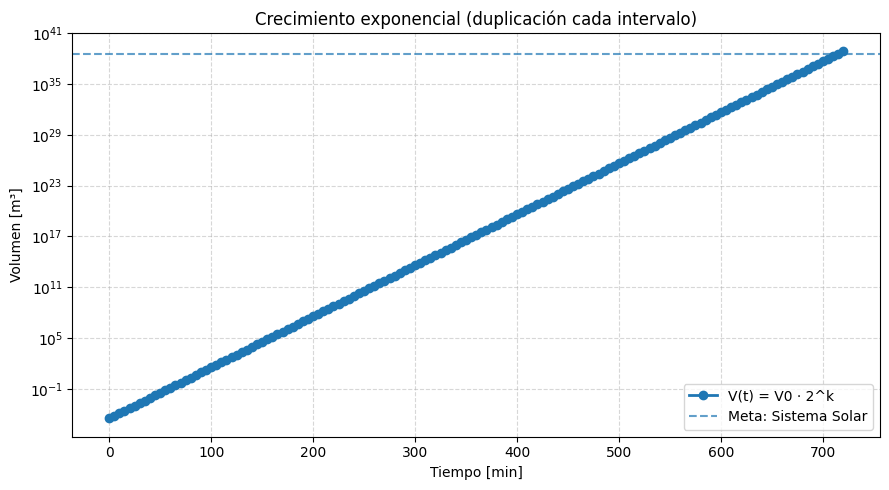

Tokyo Dome: duplicaciones = 32, tiempo ≈ 160 min (~2.67 h)


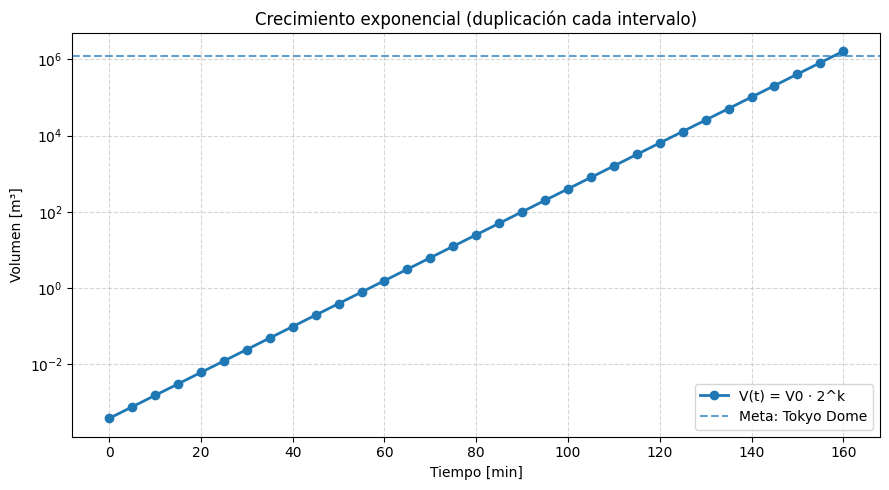

In [2]:
import math
import matplotlib.pyplot as plt

# ---------- núcleo ----------
def doublings_and_time(V0: float, Vtarget: float, doubling_minutes: float = 5.0) -> tuple[int, float]:
    """
    Devuelve:
      k  : número mínimo de duplicaciones para alcanzar/superar Vtarget
      t  : tiempo total en minutos
    """
    if V0 <= 0 or Vtarget <= 0:
        raise ValueError("V0 y Vtarget deben ser positivos.")
    k = math.ceil(math.log2(Vtarget / V0))
    t_min = k * doubling_minutes
    return k, t_min

def build_series(V0: float, k: int, doubling_minutes: float = 5.0):
    """
    Serie de tiempos (min) y volúmenes (m³) para k duplicaciones,
    incluyendo el punto inicial (i=0) y el punto final (i=k).
    """
    times = [i * doubling_minutes for i in range(k + 1)]
    vols  = [V0 * (2 ** i)           for i in range(k + 1)]
    return times, vols

def plot_growth(times, vols, Vtarget=None, obj_name="objetivo"):
    plt.figure(figsize=(9,5))
    plt.plot(times, vols, marker="o", linewidth=2, label="V(t) = V0 · 2^k")
    if Vtarget is not None:
        plt.axhline(Vtarget, ls="--", label=f"Meta: {obj_name}", alpha=0.7)
    plt.title("Crecimiento exponencial (duplicación cada intervalo)")
    plt.xlabel("Tiempo [min]")
    plt.ylabel("Volumen [m³]")
    plt.yscale("log")                  # rango enorme → log
    plt.grid(True, which="both", ls="--", alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

# ---------- ejemplos reutilizables ----------
# Supuestos (ajústalos si quieres)
V_BOLLO   = 3.35e-5          # m³  (tu estimación)
V_TD      = 1.24e6           # m³  (Tokyo Dome aprox.)
V_SOLAR   = 3.8e38           # m³  (esfera ~30 AU aprox.)
DT        = 5.0              # min por duplicación

# 1) Bollo → Sistema Solar
k, t_min = doublings_and_time(V_BOLLO, V_SOLAR, DT)
times, vols = build_series(V_BOLLO, k, DT)
print(f"Sistema Solar: duplicaciones = {k}, tiempo ≈ {t_min:.0f} min (~{t_min/60:.2f} h)")
plot_growth(times, vols, Vtarget=V_SOLAR, obj_name="Sistema Solar")

# 2) Pelota de béisbol → Tokyo Dome (ejemplo general)
V_PELOTA = 3.8e-4            # m³  (aprox.)
k2, t_min2 = doublings_and_time(V_PELOTA, V_TD, DT)
times2, vols2 = build_series(V_PELOTA, k2, DT)
print(f"Tokyo Dome: duplicaciones = {k2}, tiempo ≈ {t_min2:.0f} min (~{t_min2/60:.2f} h)")
plot_growth(times2, vols2, Vtarget=V_TD, obj_name="Tokyo Dome")
